# Inferential Statistics - Confidence Intervals
A confidence interval is the mean of your estimate plus and minus the variation in that estimate. This is the range of values you expect your estimate to fall between if you redo your test, within a certain level of confidence.

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# add seed for randoming data
np.random.seed(42)

In [2]:
# import dataset
df = pd.read_csv("C:\\Users\\vegat\\Porto Data\\statistic\\coffee_dataset.csv")

In [3]:
df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [4]:
df.shape

(2974, 4)

The dataset contains 2974 rows and 4 coloum of age, height, and boleean of drinks coffee.

#### Take a sample
sample is used to minimize the cost of algorithms but still represents of the full data.

Here an example of take a 200 sample data from a full dataset;

In [6]:
# import dataset
c_full =  pd.read_csv("C:\\Users\\vegat\\Porto Data\\statistic\\coffee_dataset.csv")
# take a sample
c_sample = c_full.sample(200)

In [7]:
c_sample

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120
...,...,...,...,...
1187,6237,<21,False,62.493744
463,1857,<21,False,66.476106
1195,6397,<21,False,64.555794
1080,4065,<21,False,66.842149


In [9]:
c_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 2402 to 1422
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        200 non-null    int64  
 1   age            200 non-null    object 
 2   drinks_coffee  200 non-null    bool   
 3   height         200 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB


#### Comparing mean

comparing the mean of coffee drinker and non coffee drinker

In [10]:
mean_drinker = c_sample["drinks_coffee"].mean()
mean_non_drinker = 1 - mean_drinker
print(mean_drinker)
print(mean_non_drinker)

0.595
0.405


comparing the mean of heigth between coffee drinker and non coffee drinker

In [11]:
# height of coffee drinker
drinks_height = c_sample[c_sample["drinks_coffee"]]["height"].mean()
drinks_height

68.11962990858618

In [12]:
# height of non coffee drinker
non_drink_height = c_sample[~c_sample["drinks_coffee"]]["height"].mean()
non_drink_height

66.78492279927877

check the mean of coffee drinker in a sample

In [14]:
bootsamp = c_sample.sample(200,replace=True)
bootsamp["drinks_coffee"].mean()

0.605

#### Confidence Intervals
make a Confidence Intervals of a mean of height from people that didn't drinks coffee with 10000 iteration of mean and 200 of samples.

(array([  16.,  106.,  590., 1831., 2989., 2644., 1352.,  377.,   86.,
           9.]),
 array([65.24631713, 65.56293231, 65.8795475 , 66.19616268, 66.51277787,
        66.82939305, 67.14600823, 67.46262342, 67.7792386 , 68.09585379,
        68.41246897]),
 <BarContainer object of 10 artists>)

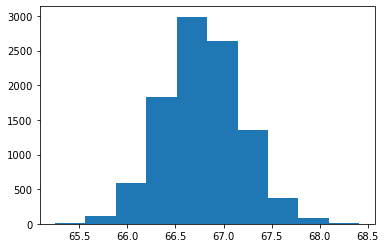

In [15]:
boot_means = []
for i in range(10000):
    bootsamp = c_sample.sample(200,replace=True)
    mean = bootsamp[bootsamp["drinks_coffee"]==False]["height"].mean()
    boot_means.append(mean)
    
plt.hist(boot_means)

In [18]:
np.percentile(boot_means,2.5), np.percentile(boot_means,97.5)

(65.99291328157521, 67.58402738281573)

from the code above we can see the confidence interval of a mean of height from people that didn't drinks coffee is between 65.99 and 67.58.